In [1]:
# Define Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# For Regression Problems
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evaluate Regression Models
from sklearn.metrics import mean_squared_error

# Evaluate Classification Models
from sklearn.metrics import roc_auc_score

## Missing Values

Data yang hilang, atau Nilai yang hilang, terjadi ketika tidak ada data / nilai yang disimpan untuk pengamatan tertentu dalam suatu variabel.

Missing data adalah kejadian umum baik dalam kompetisi ilmu data maupun dalam domain bisnis, dan dapat berdampak signifikan pada kesimpulan yang dapat diambil dari data tersebut. Data yang tidak lengkap adalah masalah yang tidak dapat dihindari dalam menangani sebagian besar sumber data.

---
## A.1. Why is data missing?

berikut adalah berbagai alasan mengapa data bisa hilang.

* Sebuah nilai bisa hilang atau tidak tersimpan dengan baik pada saat pengumpulan data.

Bayangkan misalnya data berasal dari survei, dan data dimasukkan secara manual ke dalam formulir online. Entri data dapat dengan mudah lupa melengkapi bidang dalam formulir, dan oleh karena itu, nilai untuk formulir tersebut akan hilang.

* Nilai tidak ada.

Contoh : Variabel yang dibuat dengan membagi satu variabel dengan variabel lainnya, seperti debt to income ratio. Jika orang tersebut tidak memiliki penghasilan, kami tidak dapat menghasilkan nilai karena pembagian dengan nol tidak ditentukan.

* Data yang hilang juga muncul saat orang menolak menjawab pertanyaan tertentu saat mengisi formulir.

Orang yang ditanya mungkin tidak mau mengungkapkan jawaban atas salah satu pertanyaan, misalnya penghasilannya. Itu akan menjadi nilai yang hilang untuk orang itu.

Bersamaan dengan memahami sumber data yang hilang, penting untuk memahami mekanisme di mana bidang yang hilang diperkenalkan dalam kumpulan data. Bergantung pada mekanismenya, kami dapat memilih untuk memproses nilai yang hilang secara berbeda. Selain itu, dengan mengetahui sumber data yang hilang, kami dapat memilih untuk mengambil tindakan untuk mengontrol sumber tersebut, dan mengurangi jumlah data yang hilang selama pengumpulan data.

## A.2. Dataset
Sebelum kita mendalami lebih jauh tentang missing value, berikut adalah beberapa dataset yang akan digunakan untuk memperjelas tujuan dari notebook ini.

Mungkin salah satu bangkai kapal paling terkenal dalam sejarah, Titanic tenggelam setelah bertabrakan dengan gunung es, menewaskan 1502 dari 2224 orang di dalamnya. Menariknya, dengan menganalisis kemungkinan bertahan hidup berdasarkan beberapa atribut seperti `jenis kelamin`, `usia`, dan `status sosial`, kami dapat membuat prediksi yang sangat akurat tentang **penumpang mana yang akan selamat**.

Beberapa kelompok orang lebih mungkin bertahan hidup daripada yang lain, seperti wanita, anak-anak, dan kelas atas. Oleh karena itu, kita dapat belajar tentang prioritas dan keistimewaan masyarakat pada saat itu.

To download the Titanic data, go ahead to the [Kaggle website](https://www.kaggle.com/c/titanic/data)

---
#### Data Description


| Variable | Definition | Key |
| --- | --- | --- |
| Survival | Survival | 0 = No, <br><br> 1 = Yes |
| Pclass	| Passenger class	<br><br> (is a proxy for socio-economy class)| 1 = 1st (Upper), <br><br> 2 = 2nd (Middle), <br><br> 3 = 3rd (Lower) |
| Sex	| Sex	| - |
| Age	| Age in years | - |
| Sibsp |	Number of siblings / spouses aboard the Titanic	| - |
| Parch	| Number of parents / children aboard the Titanic	| - |
| Ticket |	Ticket number	| - |
| Fare	| Passenger fare	<br><br> (in GBP) | - |
| Cabin	| Cabin number | - |
| Embarked	| Port of Embarkation	| C = Cherbourg, <br><br> Q = Queenstown, <br><br> S = Southampton |

In [2]:
# Load Titanic Dataset

data_titanic_ori = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv')
data_titanic = data_titanic_ori.copy()
data_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Check Missing Values

data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Check Missing Values as Percentage to Total Data

data_titanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Kita dapat melihat bahwa ada data yang hilang pada variabel Age, Cabin dan Embarked (yang merupakan pelabuhan tempat penumpang masuk ke Titanic).

## A.2.2. Mercedez-Benz Greener Manufacturing
Kumpulan data ini berisi sekumpulan variabel yang dianonimkan, masing-masing mewakili fitur khusus di mobil Mercedes. Misalnya, variabelnya bisa 4WD, suspensi udara tambahan, atau tampilan head-up. Kebenaran dasar diberi label 'y' dan mewakili waktu (dalam detik) yang dibutuhkan mobil untuk lulus pengujian untuk setiap variabel.

You can see the dataset [here](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data)

In [5]:
# Load Mercedes-Benz Dataset

data_mercedes_ori = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Mercedes-Benz.csv')
data_mercedes = data_mercedes_ori.copy()
data_mercedes.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


## A.2.3. House Sale
Let's use dataset from [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). 

Dataset ini berisi atribut rumah dan harganya. Tugas kita adalah membuat model prediksi yang dapat memprediksi harga rumah berdasarkan atribut yang diberikan. Setiap data berisi lebih dari 70 atribut/fitur. Daftar contoh fitur:

* `SalePrice` : the property's sale price in dollars. This is the target variable that you're trying to predict.
* `MSSubClass` : The building class
* `MSZoning` : The general zoning classification
* `LotFrontage` : Linear feet of street connected to property
* `LotArea` : Lot size in square feet
* `Street` : Type of road access
* `Alley` : Type of alley access
* `LotShape` : General shape of property
* `LandContour` : Flatness of the property
* `Utilities` : Type of utilities available
* `LotConfig` : Lot configuration
* `LandSlope`: Slope of property

In [6]:
# Load House Prices

data_house_prices_ori = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20House-Prices.csv')
data_house_prices = data_house_prices_ori.copy()
data_house_prices.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## A.3. Missing Data Mechanisms

Ada 3 mekanisme yang menyebabkan data hilang, 2 di antaranya melibatkan data yang hilang secara acak atau hampir acak, dan yang ketiga melibatkan hilangnya data secara sistematis.

### A.3.1. Missing Completely at Random (MCAR)

Ciri-Ciri Missing Completely At Random (MCAR) :
* **Kemungkinan tidak ada sama untuk semua pengamatan (baris).**
* Sama sekali **tidak ada hubungan antara data yang hilang dan nilai lainnya, yang diamati atau hilang, dalam kumpulan data.** Dengan kata lain, titik data yang hilang tersebut adalah subkumpulan data acak. Tidak ada yang sistematis terjadi yang membuat beberapa data lebih mungkin hilang daripada yang lain.
* Mengabaikan kasus tersebut tidak akan membiaskan kesimpulan yang dibuat *(hanya jika jumlah total nilai yang hilang kecil)*.

In [7]:
# Check Missing Values for Variable `Embarked`

data_titanic[data_titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Seperti yang Anda lihat di atas, Nona Icard dan Nyonya Stones melakukan perjalanan bersama. Hal ini terlihat dari jenis `Tiket` yang sama. Setelah searching di internet, ternyata Miss Icard adalah pembantu Mrs. Stone.

Kesimpulan dari nilai yang hilang untuk `Embarked` (berdasarkan asumsi pribadi):
* Tampaknya tidak ada indikasi bahwa informasi yang hilang dalam variabel Memulai bergantung pada variabel lainnya.
* Fakta bahwa para wanita ini selamat, berarti bahwa mereka dapat dimintai informasi ini.
* Kemungkinan besar ketiadaan ini dihasilkan pada saat pembuatan kumpulan data dan oleh karena itu kami dapat berasumsi bahwa ini benar-benar acak.
* Kita dapat berasumsi bahwa probabilitas data yang hilang untuk 2 wanita ini sama dengan probabilitas hilangnya variabel ini untuk orang lain. Tentu saja ini akan sulit, jika mungkin, untuk dibuktikan.

### A.3.2. Missing at Random (MAR)

Ciri-ciri Missing At Random (MAR) :
* **Probabilitas pengamatan yang hilang hanya bergantung pada informasi yang tersedia**.
* **Ada hubungan sistematis antara kecenderungan nilai yang hilang dan data yang diamati**.

### A.3.3. Missing Not At Random (MNAR)

Ciri-ciri Missing Not At Random (MNAR) :
* **Ada mekanisme atau alasan mengapa nilai yang hilang diperkenalkan** dalam kumpulan data.
* Hilangnya mereka bergantung pada informasi yang tidak tercatat dalam kumpulan data.
* Dalam situasi ini, kita akan **lebih baik menandai nilai yang hilang tersebut** untuk memprediksi target kita.

---
Mari kita asumsikan dataset Titanic :

> *Bagi banyak orang yang tidak selamat, `Umur` yang mereka miliki atau `Kabin` tempat mereka tinggal, tidak dapat ditetapkan. Orang-orang yang selamat dapat dimintai informasi tersebut.*

Dari asumsi di atas, kami menyatakan bahwa hilangnya data `Age` dan data `Cabin` merupakan efek dari parameter `Survived`, yaitu `0` dimana penumpang tidak selamat.

Bisakah kita menyimpulkan ini dengan melihat data? *Kita bisa mengharapkan lebih banyak nilai yang hilang untuk orang-orang yang tidak selamat*.

In [8]:
# Create a variable that indicates whether the value of the variable `cabin` is missing or not

data_titanic = data_titanic_ori.copy()
data_titanic['cabin_null'] = np.where(data_titanic.Cabin.isnull(), 1, 0)
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [9]:
# Grouping data by Survived vs Non-Survived and find nulls for cabin

print('Value Counts')
print(data_titanic.groupby(['Survived'])['cabin_null'].value_counts())

print('\nMean')
print(data_titanic.groupby(['Survived'])['cabin_null'].mean())

Value Counts
Survived  cabin_null
0         1             481
          0              68
1         1             206
          0             136
Name: cabin_null, dtype: int64

Mean
Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64


Kami mengamati bahwa persentase nilai yang hilang lebih tinggi untuk orang yang tidak selamat (0,87), sehubungan dengan orang yang selamat (0,60).
Temuan ini sejalan dengan asumsi kami bahwa data tersebut hilang karena setelah orang meninggal, informasi tersebut tidak dapat diperoleh kembali.

Karena itu, untuk benar-benar mendukung apakah data hilang tidak secara acak, kita harus sangat memahami cara pengumpulan data. **Menganalisis kumpulan data, hanya dapat mengarahkan kita ke arah yang benar atau membantu kita membuat asumsi, tetapi tidak akan memberikan bukti akhir mengapa data hilang.**

In [10]:
# Create a variable that indicates whether the value of the variable `Age` is missing or not

data_titanic['age_null'] = np.where(data_titanic.Age.isnull(), 1, 0)
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [11]:
# Grouping data by Survived vs Non-Survived and find nulls for `Age`

print('Value Counts')
print(data_titanic.groupby(['Survived'])['age_null'].value_counts())

print('\nMean')
print(data_titanic.groupby(['Survived'])['age_null'].mean())

Value Counts
Survived  age_null
0         0           424
          1           125
1         0           290
          1            52
Name: age_null, dtype: int64

Mean
Survived
0    0.227687
1    0.152047
Name: age_null, dtype: float64


Sekali lagi, kami mengamati peningkatan data yang hilang untuk orang-orang yang tidak selamat dari tragedi tersebut. Oleh karena itu analisis menyarankan:

**Ada kehilangan data yang sistematis: orang yang tidak selamat cenderung kehilangan lebih banyak informasi. Agaknya, metode yang dipilih untuk mengumpulkan informasi, berkontribusi pada pembuatan data yang hilang ini.**

## A.4. Complete Case Analysis

Analisis kasus lengkap (CCA), juga disebut penghapusan kasus berdasarkan daftar, hanya terdiri dari **penghapusan** pengamatan di mana nilai dalam salah satu variabel tidak ada. Analisis Kasus Lengkap berarti hanya menganalisis pengamatan yang memiliki informasi di **semua** variabel (Xs).

CCA dapat diterapkan pada variabel kategori dan numerik.

**Asumsi** :
* **CCA bekerja dengan baik ketika data hilang secara acak (MCAR).**
* Dalam hal ini, mengecualikan pengamatan dengan data yang hilang akan sama dengan mengecualikan beberapa pengamatan secara acak dari kumpulan data, mengingat bahwa data yang hilang benar-benar acak.
* Berfungsi dengan baik jika jumlah total nilai yang hilang kecil.

**Keuntungan** :
* Mudah diimplementasikan
* Kumpulan data yang sama (walaupun kumpulan yang dikurangi) digunakan untuk semua analisis (tidak ada manipulasi data)
* Mempertahankan distribusi variabel (jika data adalah MCAR, maka distribusi variabel dari kumpulan data yang dikurangi harus sesuai dengan distribusi di kumpulan data asli)

**Kekurangan** :
* Itu dapat mengecualikan sebagian besar sampel asli, yang berpotensi informatif untuk analisis
* CCA akan menjadi bias jika kasus lengkap secara sistematis berbeda dari sampel asli (misalnya ketika informasi yang hilang sebenarnya MAR (Missing At Random) atau MNAR (Missing Not At Random).

### Studi kasus

Mari kita lihat kumpulan data Titanic. Dengan asumsi bahwa nilai yang hilang adalah MCAR, yang bukan, jika kami memilih untuk menghapus semua pengamatan yang hilang, kami akan mendapatkan kumpulan data yang sangat kecil, mengingat bahwa `Cabin` hilang untuk 77% dari pengamatan. Lihat di bawah.

In [12]:
# Count How Many Observations that We Would Drop

data_titanic = data_titanic_ori.copy()
print('Total passengers in the Titanic               : ', data_titanic.shape[0])
print('Total passengers with values in all variables : ', data_titanic.dropna().shape[0])
print('Percentage of data without missing values (%) : ', data_titanic.dropna().shape[0] / np.float(data_titanic.shape[0]) * 100)

Total passengers in the Titanic               :  891
Total passengers with values in all variables :  183
Percentage of data without missing values (%) :  20.53872053872054


Faktanya, kami hanya memiliki informasi lengkap untuk 20% dari pengamatan kami di kumpulan data Titanic. Dengan demikian, CCA tidak akan menjadi pilihan untuk dataset ini.

Namun, kita dapat memilih untuk:
* Ganti nilai yang hilang dalam variabel `Age` dan `Cabin` dengan metode yang sesuai (seperti pada bagian selanjutnya), dan
* Hapus pengamatan di mana `Embarked` tidak ada. Itu hanya akan menghapus 2 pengamatan dari seluruh kumpulan data.

### Distribusi set data setelah CCA

**Jika kami menghapus sejumlah besar observasi yang hilang, kumpulan data baru yang berisi orang-orang yang semua datanya tersedia, akan sangat berbeda dari grup aslinya.** Lihat di bawah:

In [13]:
# Check How Many Missing Values in Variable `Age` Only

data_titanic.Age.isnull().sum()

177

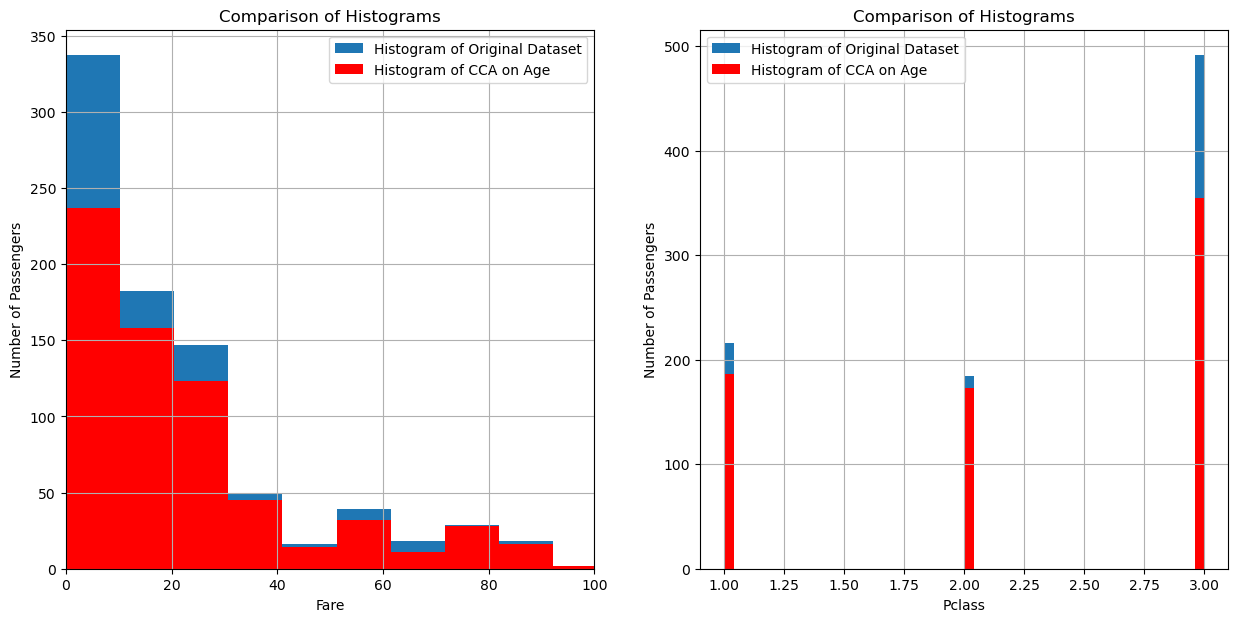

In [14]:
# Visualization of Histogram Differences between the Original Dataset and CCA for the Variable `Age` Only
# We Will Check the Effect of CCA Only to Variable `Fare` and `Pclass`

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

data_titanic.Fare.hist(bins=50, ax=ax[0], label='Histogram of Original Dataset') # Histogram of original dataset
data_titanic.dropna(axis=0, subset=['Age'])['Fare'].hist(bins=50, ax=ax[0], color='red', label='Histogram of CCA on Age') # Histogram of CCA on Age
ax[0].set_xlim(0,100)
ax[0].set_title('Comparison of Histograms')
ax[0].set_xlabel('Fare')
ax[0].set_ylabel('Number of Passengers')
ax[0].legend(loc="upper right")

data_titanic.Pclass.hist(bins=50, ax=ax[1], label='Histogram of Original Dataset') # Histogram of original dataset
data_titanic.dropna(axis=0, subset=['Age'])['Pclass'].hist(bins=50, ax=ax[1], color='red', label='Histogram of CCA on Age') # Histogram of CCA on Pclass
ax[1].set_title('Comparison of Histograms')
ax[1].set_xlabel('Pclass')
ax[1].set_ylabel('Number of Passengers')
ax[1].legend(loc="upper left")

Membandingkan histogram merah dan biru kita dapat mengamati bahwa distribusi seluruh dataset sebelum CCA tidak sesuai dengan dataset setelah CCA. Ada banyak orang yang kehilangan `Usia`, yang membayar tarif lebih rendah untuk naik titanic.

Demikian pula, kumpulan data asli menunjukkan proporsi orang yang lebih tinggi yang melakukan perjalanan di `Pclass` 3.

Mengingat bahwa distribusi variabel antara kumpulan data asli dan setelah CCA tidak setara, CCA bukanlah pilihan yang baik.

## Suggestion
Dalam praktiknya, **CCA dapat menjadi metode yang dapat diterima ketika jumlah informasi yang hilang kecil. Sayangnya, tidak ada aturan praktis untuk menentukan berapa banyak data yang hilang, kecil atau dapat diabaikan.**

Dalam banyak kumpulan data kehidupan nyata, jumlah data yang hilang tidak pernah kecil, dan oleh karena itu CCA biasanya tidak pernah menjadi pilihan.

Untuk membangun model pembelajaran mesin, sebaiknya ganti nilai yang hilang dengan salah satu metode. Namun, untuk analisis cepat, jika jumlah nilai yang hilang tidak besar, ini bisa menjadi pendekatan termudah dan tercepat.

## A.5. Mean and Median Imputation
**Imputasi adalah tindakan mengganti data yang hilang dengan perkiraan statistik dari nilai yang hilang.** Tujuan dari setiap teknik imputasi adalah menghasilkan kumpulan data lengkap yang dapat digunakan untuk pembelajaran mesin atau pembelajaran mendalam.

Rata-rata / median imputasi terdiri dari mengganti semua kemunculan nilai yang hilang (NA) dalam variabel dengan:
* **Mean** : jika variabel memiliki **distribusi Normal/Gaussian**.
* **Median** : jika variabel memiliki **distribusi miring**.

**Asumsi** : Data hilang secara acak (MCAR).

Jika demikian, kita dapat berpikir untuk mengganti NA dengan variabel yang paling sering muncul, yang merupakan rata-rata jika variabel memiliki distribusi Gaussian, atau median sebaliknya.

**Keuntungan** :
* Mudah diimplementasikan
* Cara cepat mendapatkan kumpulan data lengkap

**Batasan** :
* Distorsi varian asli
  
   Saat mengganti NA dengan rata-rata atau median, varians variabel akan terdistorsi jika jumlah NA sangat besar dibandingkan dengan jumlah total pengamatan (karena nilai yang dimasukkan tidak berbeda dari rata-rata atau satu sama lain). Oleh karena itu menyebabkan meremehkan varians.

* Distorsi kovarians/korelasi dengan variabel yang tersisa dalam kumpulan data

   Selain itu, perkiraan kovarians dan korelasi dengan variabel lain dalam kumpulan data juga dapat terpengaruh. Ini karena kita mungkin menghancurkan korelasi intrinsik karena rata-rata/median yang sekarang menggantikan NA tidak akan mempertahankan hubungan dengan variabel yang tersisa.

**Imputasi harus dilakukan pada set pelatihan, lalu disebarkan ke set pengujian.** Artinya, rata-rata/median yang akan digunakan untuk mengisi nilai yang hilang baik di set pelatihan dan pengujian, harus diekstraksi dari set pelatihan saja .

### Case Study

We will use Titanic dataset for this demonstration and use Mean/Median Imputation to handle missing values.

In [15]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

Skewness :  0.3361317253050765


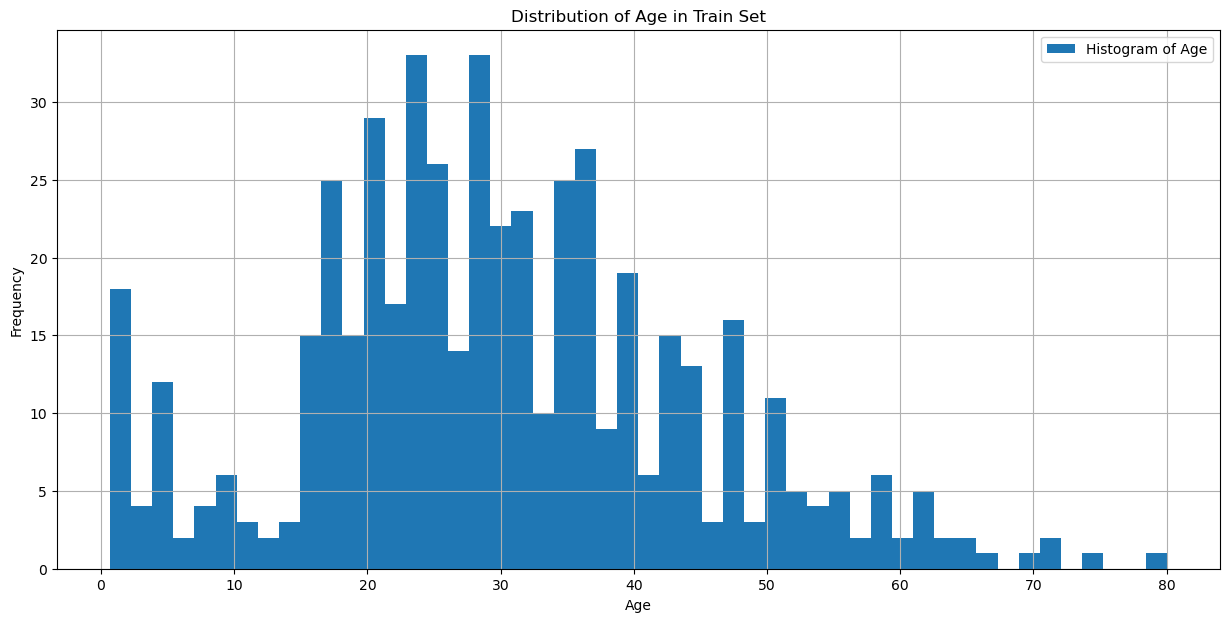

In [16]:
# Let's Check Type of Distirbution of Variable `Age`
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

X_train_titanic.Age.hist(bins=50, ax=ax, label='Histogram of Age') # Histogram of original dataset
ax.set_title('Distribution of Age in Train Set')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend(loc="upper right")

print('Skewness : ', X_train_titanic.Age.skew())

In [17]:
# Display Value of Median Before Imputation

mean_titanic_age = X_train_titanic.Age.mean()
median_titanic_age = X_train_titanic.Age.median()

print('Mean Value - Train Set - Before Imputation   : ', mean_titanic_age)
print('Median Value - Train Set - Before Imputation : ', median_titanic_age)

Mean Value - Train Set - Before Imputation   :  29.915338645418327
Median Value - Train Set - Before Imputation :  29.0


In [18]:
# Function to Filling Missing Values with Zeroes, Mean, and Median

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  
  return df

In [19]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0


<Figure size 640x480 with 0 Axes>

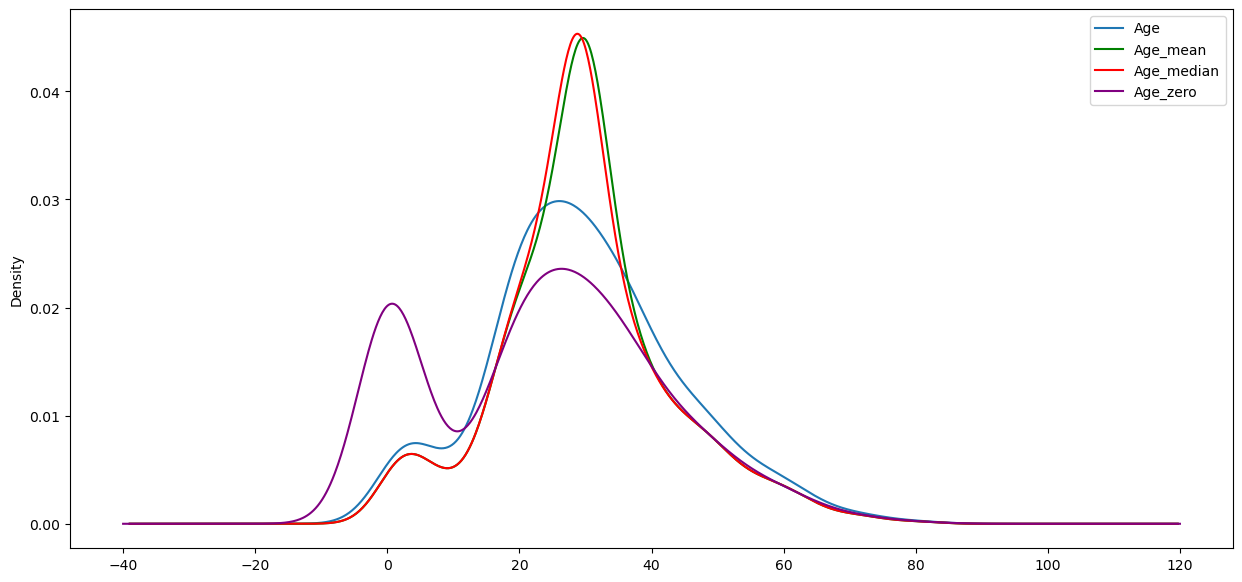

In [20]:
# Visualization Variable `Age` Before and After Imputation

fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

X_train_titanic.Age.plot(kind='kde', ax=ax)
X_train_titanic.Age_mean.plot(kind='kde', ax=ax, color='green')
X_train_titanic.Age_median.plot(kind='kde', ax=ax, color='red')
X_train_titanic.Age_zero.plot(kind='kde', ax=ax, color='purple')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Seperti disebutkan di atas, imputasi median mendistorsi distribusi asli dari variabel `Age`. Variabel yang diubah menunjukkan lebih banyak nilai di sekitar nilai rata-rata/median.

Mengisi NA dengan `0` juga mendistorsi distribusi variabel asli, menghasilkan akumulasi nilai di sekitar `0`. Kita akan melihat di bagian selanjutnya metode imputasi NA yang mempertahankan distribusi variabel.

In [21]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, and Median

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Train set zero imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test set zero imputation')
print('Random Forests zero imputation roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Train set mean imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test set mean imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Train set median imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test set median imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

Train set zero imputation
Random Forests roc-auc: 0.7555855621353116
Test set zero imputation
Random Forests zero imputation roc-auc: 0.7490476190476191

Train set mean imputation
Random Forests roc-auc: 0.751648554261296
Test set mean imputation
Random Forests roc-auc: 0.7698809523809523

Train set median imputation
Random Forests roc-auc: 0.7515021366130887
Test set median imputation
Random Forests roc-auc: 0.7697619047619049



Kami melihat bahwa imputasi rata-rata/median menghasilkan kinerja yang lebih baik daripada menggunakan nol (`0`). Mengapa?

In [22]:
print('Average total survival :', X_train_titanic.Survived.mean())

print('\nAverage real survival of children : ', X_train_titanic[X_train_titanic.Age<15].Survived.mean())
print('Average survival of children when using Age imputed with zeroes : ', X_train_titanic[X_train_titanic.Age_zero<15].Survived.mean())
print('Average survival of children when using Age imputed with mean   : ', X_train_titanic[X_train_titanic.Age_mean<15].Survived.mean())
print('Average survival of children when using Age imputed with median : ', X_train_titanic[X_train_titanic.Age_median<15].Survived.mean())

Average total survival : 0.3884430176565008

Average real survival of children :  0.5740740740740741
Average survival of children when using Age imputed with zeroes :  0.38857142857142857
Average survival of children when using Age imputed with mean   :  0.5740740740740741
Average survival of children when using Age imputed with median :  0.5740740740740741


Catatan evaluasi :
* **Anak-anak lebih mungkin selamat dari malapetaka** (0,57 untuk anak-anak vs 0,38 untuk seluruh Titanic). Dengan demikian, nilai `Usia` yang lebih kecil adalah indikator kelangsungan hidup yang baik.

* **Saat kami mengganti NA dengan nol, kami menutupi kekuatan prediktif `Usia`.** Setelah imputasi nol, sepertinya anak-anak tidak memiliki peluang lebih besar untuk bertahan hidup, dan karena itu model kehilangan kekuatan prediksi.

* Di sisi lain, **mengganti NA dengan rata-rata/median, mempertahankan kekuatan prediksi variabel Usia**, karena nilai Usia yang lebih kecil akan mendukung kelangsungan hidup.

Saran

Penggantian NA dengan mean/median banyak digunakan di komunitas data science dan di berbagai kompetisi data science.

Biasanya, imputasi rata-rata/median dilakukan bersamaan dengan menambahkan variabel untuk menangkap pengamatan tersebut di mana datanya hilang, sehingga mencakup 2 sudut: jika data hilang sepenuhnya secara acak, ini akan direnungkan dengan imputasi rata-rata/median, dan jika bukan ini akan ditangkap oleh variabel tambahan.

Selain itu, kedua metode ini sangat mudah diterapkan, dan oleh karena itu merupakan pilihan utama dalam kompetisi ilmu data.

## A.6. Random Sample Imputation

**Pengambilan sampel acak terdiri dari pengambilan pengamatan acak dari kumpulan pengamatan variabel yang tersedia, dan menggunakan nilai yang diambil secara acak untuk mengisi NA.**

Imputasi Sampel Acak pada prinsipnya mirip dengan imputasi rata-rata / median, dalam arti bertujuan untuk mempertahankan parameter statistik dari variabel asli, yang datanya hilang.

Dengan pengamatan sampel acak dari variabel untuk contoh-contoh di mana data tersedia, kami menjamin bahwa rata-rata dan standar deviasi variabel dipertahankan.

**Asumsi :**
* Data Hilang Sepenuhnya Secara Acak (MCAR).

   Jika demikian, masuk akal untuk mengganti nilai yang hilang, dengan nilai yang diambil dari distribusi variabel asli.

* Dari sudut pandang probabilistik, nilai yang lebih sering (seperti rata-rata atau median) akan lebih sering dipilih (karena ada lebih banyak untuk dipilih), tetapi nilai lain yang lebih jarang akan dipilih juga. Dengan demikian, variansi variabel dipertahankan.

   Alasannya adalah mengganti populasi nilai yang hilang dengan populasi nilai dengan distribusi variabel yang sama.

**Keuntungan :**
* Mudah diimplementasikan
* Cara cepat mendapatkan kumpulan data lengkap
* Mempertahankan varian variabel

**Keterbatasan:** Keacakan

Keacakan mungkin tidak terlalu menjadi perhatian saat mengganti nilai yang hilang untuk kompetisi data, di mana seluruh kumpulan nilai yang hilang diganti satu kali dan kemudian dataset diberi skor dan itu adalah akhir dari masalah. Namun, dalam skenario bisnis situasinya sangat berbeda.

Bayangkan misalnya skenario Mercedes-Benz, di mana mereka mencoba **memprediksi berapa lama mobil tertentu akan berada di garasi sebelum melewati semua tes keamanan.**

Skenario :
* Hari ini, mereka menerima mobil dengan data yang hilang di beberapa variabel.
* Mereka menjalankan model pembelajaran mesin untuk memprediksi berapa lama mobil ini akan berada di garasi.
* Model menggantikan nilai yang hilang dengan sampel acak dari variabel dan kemudian menghasilkan perkiraan waktu.
* Esok, ketika mereka menjalankan model yang sama pada mobil yang sama dengan data yang sama, model akan secara acak menetapkan nilai ke data yang hilang, yang mungkin sama atau tidak sama dengan yang dipilih sebelumnya,
* Estimasi akhir waktu di garasi, bisa sama atau tidak sama dengan yang diperoleh sehari sebelumnya.
* Karena data yang hilang diisi secara acak dengan nilai, 2 mobil yang persis sama dapat berakhir dengan perkiraan waktu yang berbeda di garasi.

Ini mungkin terdengar sepele dan tidak penting, namun, bisnis harus mengikuti berbagai peraturan, dan beberapa di antaranya mengharuskan **perlakuan yang sama diberikan untuk situasi yang sama**. Jadi, jika alih-alih mobil, ini adalah orang *mengajukan pinjaman*, atau *orang yang mencari pengobatan penyakit*, **model pembelajaran mesin pada akhirnya akan memberikan solusi berbeda untuk kandidat yang berada dalam kondisi yang sama. Dan ini tidak adil atau tidak dapat diterima.**

Masih mungkin untuk mengganti data yang hilang dengan sampel acak, tetapi keacakan ini perlu dikontrol, sehingga individu dalam situasi yang sama berakhir dengan skor yang sama dan solusi yang sama.

Terakhir, batasan potensial lain dari pengambilan sampel acak, mirip dengan mengganti rata-rata dan median, adalah perkiraan kovarians dan korelasi dengan variabel lain dalam kumpulan data juga dapat terhapus oleh keacakan.

## Case Study

In [23]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

In [24]:
# Display Value of Median Before Imputation

mean_titanic_age = X_train_titanic.Age.mean()
median_titanic_age = X_train_titanic.Age.median()

print('Mean Value - Train Set - Before Imputation   : ', mean_titanic_age)
print('Median Value - Train Set - Before Imputation : ', median_titanic_age)

Mean Value - Train Set - Before Imputation   :  29.915338645418327
Median Value - Train Set - Before Imputation :  29.0


In [25]:
# Function to Filling Missing Values with Zeroes and Median

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  df[variable+'_random'] = df[variable]
  
  ## Extract the random sample to fill the NA
  random_sample = X_train_titanic[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  
  ## Pandas needs to have the same index in order to merge datasets
  random_sample.index = df[df[variable].isnull()].index

  ## Merge into one dataframe
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample
  
  return df

In [26]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_random
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0,39.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0,19.0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0,14.5
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0,36.0


**Effect of Random Sample Imputation**

Random sampling preserves the original distribution of the variable.

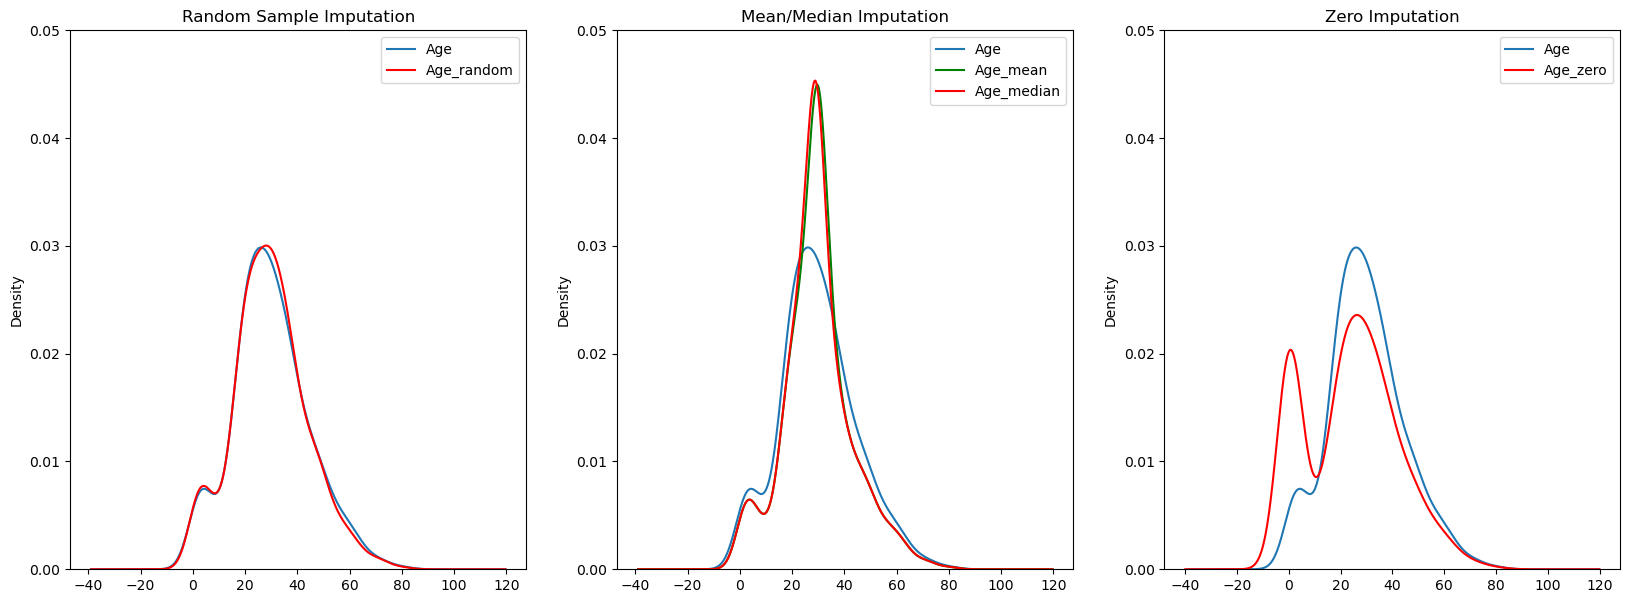

In [27]:
# Visualization Variable `Age` Before and After Random Sample Imputation

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

X_train_titanic.Age.plot(kind='kde', ax=ax[0])
X_train_titanic.Age_random.plot(kind='kde', ax=ax[0], color='red')
lines, labels = ax[0].get_legend_handles_labels()
ax[0].set_ylim(0, 0.05)
ax[0].legend(lines, labels, loc='best')
ax[0].set_title('Random Sample Imputation')
ax[0].legend(loc="upper right")

X_train_titanic.Age.plot(kind='kde', ax=ax[1])
X_train_titanic.Age_mean.plot(kind='kde', ax=ax[1], color='green')
X_train_titanic.Age_median.plot(kind='kde', ax=ax[1], color='red')
lines, labels = ax[1].get_legend_handles_labels()
ax[1].set_ylim(0, 0.05)
ax[1].legend(lines, labels, loc='best')
ax[1].set_title('Mean/Median Imputation')
ax[1].legend(loc="upper right")

X_train_titanic.Age.plot(kind='kde', ax=ax[2])
X_train_titanic.Age_zero.plot(kind='kde', ax=ax[2], color='red')
lines, labels = ax[2].get_legend_handles_labels()
ax[2].set_ylim(0, 0.05)
ax[2].legend(lines, labels, loc='best')
ax[2].set_title('Zero Imputation')
ax[2].legend(loc="upper right")

Kita dapat melihat bahwa mengganti nilai yang hilang dengan sampel acak dari set pelatihan mempertahankan distribusi asli variabel. Sedangkan mengganti dengan rata-rata, median, atau nol, mengubah distribusi.

In [28]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_random.fit(X_train_titanic[['Age_random', 'Fare']], y_train_titanic)

pred_random_train = rf_random.predict_proba(X_train_titanic[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test_titanic[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_random_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7555855621353116
Test - Random Forests roc-auc. : 0.7490476190476191

Using mean imputation
Train - Random Forests roc-auc : 0.751648554261296
Test - Random Forests roc-auc  : 0.7698809523809523

Using median imputation
Train - Random Forests roc-auc : 0.7515021366130887
Test - Random Forests roc-auc. : 0.7697619047619049

Using random sample imputation
Train - Random Forests roc-auc : 0.7542027287911325
Test - Random Forests roc-auc. : 0.754375



Kita dapat melihat bahwa mengganti NA dengan sampel acak dari kumpulan data, tidak berfungsi sebaik saat mengganti dengan median. **Namun, ini sepenuhnya karena keacakan.** Coba ubah seed (`random_sate`) di fungsi `impute_na`, lalu buat ulang `X_train_titanic` dan `X_test_titanic`, dan Anda akan melihat bagaimana performa modelnya bervariasi. Dalam beberapa kasus, kinerjanya akan lebih baik.

Jadi jika kinerja imputasi median vs imputasi sampel acak serupa, metode mana yang harus saya gunakan?

Memilih metode imputasi mana yang akan digunakan, akan bergantung pada berbagai hal:
* Apakah Anda ingin **mempertahankan distribusi** variabel?
* Apakah Anda bersedia **menerima unsur keacakan** dalam metode imputasi Anda?
* **Apa tujuan Anda?** Apakah Anda ingin memenangkan kompetisi data? atau untuk membuat keputusan yang digerakkan oleh bisnis?
* Anda harus ingat bahwa keacakan dapat **menyebabkan skor yang berbeda** ditugaskan untuk pengamatan yang sama.

**Tidak ada jawaban yang 'benar' untuk metode imputasi mana yang dapat Anda gunakan**, ini tergantung pada apa yang ingin Anda capai.

Kita dapat mengaitkan seed yang berbeda untuk setiap pengamatan, dan faktanya, kita dapat membuat seed ini **bergantung pada variabel alternatif dari observasi yang sama**.

Contoh : 2 penumpang atau lebih yang membayar `Fare` yang sama persis, mereka akan mendapatkan nilai `Age` yang sama persis jika nilai `Age` tidak ada.

Ini adalah cara untuk mengendalikan keacakan. Dengan menggunakan `Fare` untuk mengatur keadaan acak, Anda menjamin bahwa untuk 2 penumpang dengan `Fare` yang sama, `Usia` akan diganti dengan nomor yang sama, dan oleh karena itu 2 penumpang akan mendapatkan probabilitas bertahan hidup yang sama.

Dalam kumpulan data kehidupan nyata, Anda akan membuat model yang menggunakan puluhan variabel atau lebih. Jadi dalam kasus seperti itu, Anda dapat berpikir untuk **memilih 3-5 variabel yang lebih penting, yang memiliki dampak terkuat** pada output model pembelajaran mesin, dan menggabungkannya untuk membuat `random_state`. Misalnya, pelanggan yang membagi 3-5 nilai variabel utama, akan mendapatkan skor yang sama.

**Saran**

Penggantian nilai yang hilang dengan sampel acak, meskipun konsepnya mirip dengan penggantian dengan median atau rata-rata, **tidak banyak digunakan** dalam komunitas ilmu data seperti imputasi rata-rata/median, mungkin karena unsur keacakan.

Namun, ini adalah pendekatan yang valid, dengan keunggulan dibandingkan imputasi rata-rata/median karena mempertahankan distribusi variabel. Dan jika Anda memperhatikan unsur keacakan dan entah bagaimana memperhitungkannya, ini mungkin juga menjadi metode pilihan Anda.

## A.7. Adding A Variable To Capture Missing Values

### Penjelasan

Dalam kuliah sebelumnya kita mempelajari bagaimana mengganti nilai yang hilang dengan imputasi rata-rata/median atau dengan mengekstraksi sampel acak dari variabel untuk contoh di mana data tersedia, dan menggunakan nilai tersebut untuk mengganti nilai yang hilang. Kami juga membahas bahwa 2 metode ini mengasumsikan bahwa data yang hilang benar-benar hilang secara acak (MCAR).

Jadi **bagaimana jika data tidak hilang sepenuhnya secara acak?** Dengan menggunakan prosedur ini, kita akan kehilangan informasi prediktif yang penting.

Bagaimana kita bisa mencegahnya?

**Kita dapat memahami pentingnya ketidakhadiran dengan membuat variabel tambahan yang menunjukkan apakah data hilang untuk pengamatan tersebut (`1`) atau tidak (`0`)**. Variabel tambahan adalah variabel biner :
* `0` menunjukkan bahwa ada nilai untuk pengamatan itu, dan
* `1` menunjukkan bahwa nilai tidak ada untuk pengamatan tersebut.

**Keuntungan :**
* Mudah diimplementasikan
* Menangkap pentingnya kehilangan jika ada

**Kekurangan :** Memperluas ruang fitur

* Metode imputasi ini akan menambahkan 1 variabel per variabel dalam dataset dengan nilai yang hilang.

* Jadi jika kumpulan data berisi 10 fitur, dan semuanya memiliki nilai yang hilang, kita akan mendapatkan kumpulan data dengan 20 fitur.

   Fitur asli di mana kami mengganti nilai yang hilang dengan rata-rata/median (atau pengambilan sampel acak), dan 10 fitur tambahan, yang menunjukkan untuk setiap variabel, apakah nilainya hilang atau tidak.

Ini mungkin bukan masalah dalam kumpulan data dengan puluhan hingga beberapa ratus variabel, tetapi jika kumpulan data asli Anda berisi ribuan variabel, dengan membuat variabel tambahan untuk menunjukkan NA, **Anda akan mendapatkan kumpulan data yang sangat besar**.

Selain itu, data cenderung hilang untuk pengamatan yang sama pada beberapa variabel, sehingga mungkin juga terjadi, banyak variabel yang Anda tambahkan akan benar-benar mirip satu sama lain.

## Case Study - Titanic Dataset

In [29]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

In [30]:
# Function to Filling Missing Values with Zeroes, Mean, Median, and Adding A Variable

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  df[variable+'_random'] = df[variable]
  
  ## Extract the random sample to fill the NA
  random_sample = X_train_titanic[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  
  ## Pandas needs to have the same index in order to merge datasets
  random_sample.index = df[df[variable].isnull()].index

  ## Merge into one dataframe
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample

  df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
  
  return df

In [31]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_random,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,16.0,1
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,8.000000,8.0,8.0,8.0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,24.000000,24.0,24.0,24.0,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,20.000000,20.0,20.0,20.0,0
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,30.000000,30.0,30.0,30.0,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,24.000000,24.0,24.0,24.0,0


In [32]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_random.fit(X_train_titanic[['Age_random', 'Fare']], y_train_titanic)

pred_random_train = rf_random.predict_proba(X_train_titanic[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test_titanic[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_random_test[:,1])))
print()

## Model with `Age_NA`
rf_NA = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_NA.fit(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']], y_train_titanic)

pred_NA_train = rf_NA.predict_proba(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']])
pred_NA_test = rf_NA.predict_proba(X_test_titanic[['Age_mean', 'Age_NA', 'Fare']])

print('Using Capturing Missing Value')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_NA_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_NA_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7553306869699139
Test - Random Forests roc-auc. : 0.740654761904762

Using mean imputation
Train - Random Forests roc-auc : 0.749154031365914
Test - Random Forests roc-auc  : 0.7630059523809525

Using median imputation
Train - Random Forests roc-auc : 0.7500271143792976
Test - Random Forests roc-auc. : 0.7614285714285715

Using random sample imputation
Train - Random Forests roc-auc : 0.7534001431639226
Test - Random Forests roc-auc. : 0.756875

Using Capturing Missing Value
Train - Random Forests roc-auc : 0.7548209366391183
Test - Random Forests roc-auc. : 0.7614880952380954



Dalam dataset Titanic, kita dapat melihat bahwa model menghasilkan akurasi yang sama dalam performa Random Forest. Mari kita coba metode ini dalam masalah regresi.

## Case Study - House Prices Dataset

In [33]:
# For Demonstration Purposes, We Are Going to Use These Columns

cols_to_use = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea','WoodDeckSF', 'BsmtUnfSF',
               'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

data_house_prices = data_house_prices_ori.copy()
data_house_prices = data_house_prices[cols_to_use + ['SalePrice']]
data_house_prices.head(10)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,7,856,856,1710,0,150,65.0,196.0,2003.0,208500
1,6,1262,1262,1262,298,284,80.0,0.0,1976.0,181500
2,7,920,920,1786,0,434,68.0,162.0,2001.0,223500
3,7,756,961,1717,0,540,60.0,0.0,1998.0,140000
4,8,1145,1145,2198,192,490,84.0,350.0,2000.0,250000
5,5,796,796,1362,40,64,85.0,0.0,1993.0,143000
6,8,1686,1694,1694,255,317,75.0,186.0,2004.0,307000
7,7,1107,1107,2090,235,216,NaN,240.0,1973.0,200000
8,7,952,1022,1774,90,952,51.0,0.0,1931.0,129900
9,5,991,1077,1077,0,140,50.0,0.0,1939.0,118000


In [34]:
# Check Missing Values in House Prices Dataset

data_house_prices.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [35]:
# Let's Separate Dataset into Training Set and Testing Set

X_train, X_test, y_train, y_test = train_test_split(data_house_prices, 
                                                    data_house_prices.SalePrice, 
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

In [36]:
# Display X_train

X_train

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
64,7,1057,1057,2034,576,318,NaN,573.0,1998.0,219500
682,6,1291,1291,1291,307,288,NaN,0.0,1996.0,173000
960,5,858,858,858,117,162,50.0,0.0,NaN,116500
1384,6,560,698,1258,0,356,60.0,0.0,1939.0,105000
1100,2,290,438,438,0,0,60.0,0.0,1930.0,60000
...,...,...,...,...,...,...,...,...,...,...
763,8,1252,1268,2365,0,89,82.0,673.0,1999.0,337000
835,4,1067,1067,1067,290,625,60.0,0.0,1996.0,128000
1216,6,0,1318,1902,0,0,68.0,0.0,1978.0,112000
559,7,1374,1557,1557,143,1374,NaN,18.0,2003.0,234000


Skewness - LotFrontage :  1.8847801735623813
Skewness - MasVnrArea  :  2.7582019163711244
Skewness - GarageYrBlt :  -0.6669763943317643


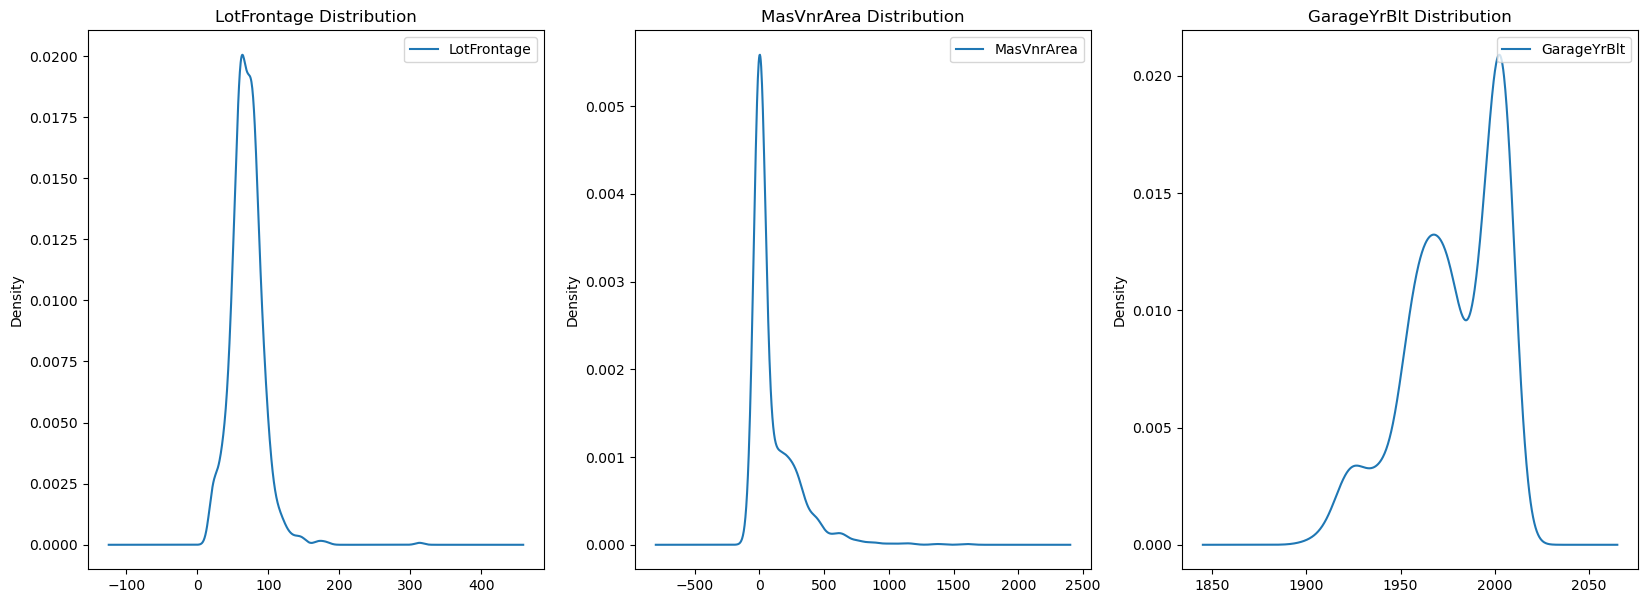

In [37]:
# Visualization Variable `Age` Before and After Random Sample Imputation

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

X_train.LotFrontage.plot(kind='kde', ax=ax[0])
lines, labels = ax[0].get_legend_handles_labels()
ax[0].legend(lines, labels, loc='best')
ax[0].set_title('LotFrontage Distribution')
ax[0].legend(loc="upper right")

X_train.MasVnrArea.plot(kind='kde', ax=ax[1])
lines, labels = ax[1].get_legend_handles_labels()
ax[1].legend(lines, labels, loc='best')
ax[1].set_title('MasVnrArea Distribution')
ax[1].legend(loc="upper right")

X_train.GarageYrBlt.plot(kind='kde', ax=ax[2])
lines, labels = ax[2].get_legend_handles_labels()
ax[2].legend(lines, labels, loc='best')
ax[2].set_title('GarageYrBlt Distribution')
ax[2].legend(loc="upper right")

print('Skewness - LotFrontage : ', X_train.LotFrontage.skew())
print('Skewness - MasVnrArea  : ', X_train.MasVnrArea.skew())
print('Skewness - GarageYrBlt : ', X_train.GarageYrBlt.skew())

Kami mengamati berdasarkan nilai visualisasi atau kemiringan bahwa **semua variabel dengan nilai yang hilang memiliki distribusi miring**. Jadi, kami akan menggunakan Median, bukan Mean.

In [38]:
# Function to Filling Missing Values with Median and 0/1

def impute_na(df, variable, median):
  df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
  df[variable].fillna(median, inplace=True)

  return df

In [39]:
# Display Median Value for Variables that have Missing Values

X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].median()

LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [40]:
# Impute Missing Values
X_train = impute_na(X_train, 'LotFrontage', X_train['LotFrontage'].median())
X_train = impute_na(X_train, 'MasVnrArea', X_train['MasVnrArea'].median())
X_train = impute_na(X_train, 'GarageYrBlt', X_train['GarageYrBlt'].median())

X_test = impute_na(X_test, 'LotFrontage', X_test['LotFrontage'].median())
X_test = impute_na(X_test, 'MasVnrArea', X_test['MasVnrArea'].median())
X_test = impute_na(X_test, 'GarageYrBlt', X_test['GarageYrBlt'].median())

X_train.head(15)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice,LotFrontage_NA,MasVnrArea_NA,GarageYrBlt_NA
64,7,1057,1057,2034,576,318,69.0,573.0,1998.0,219500,1,0,0
682,6,1291,1291,1291,307,288,69.0,0.0,1996.0,173000,1,0,0
960,5,858,858,858,117,162,50.0,0.0,1979.0,116500,0,0,1
1384,6,560,698,1258,0,356,60.0,0.0,1939.0,105000,0,0,0
1100,2,290,438,438,0,0,60.0,0.0,1930.0,60000,0,0,0
416,6,672,672,1400,0,463,74.0,203.0,1978.0,149500,0,0,0
1034,5,920,954,954,0,920,50.0,0.0,1938.0,119750,0,0,0
853,6,1127,1445,1445,180,563,69.0,115.0,1964.0,158000,1,0,0
472,6,547,1072,1072,0,88,35.0,80.0,2005.0,148000,0,0,0
1011,5,0,1664,1664,0,0,75.0,0.0,1979.0,100000,0,0,1


In [41]:
# Define List of Columns with 0/1 Imputation

cols_with_na = list(X_train.columns)
cols_with_na.remove('SalePrice')

print('Default Column            : ', cols_to_use)
print('All Columns in X_train    : ', list(X_train.columns))
print('Final Column for Training : ', cols_with_na)

Default Column            :  ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
All Columns in X_train    :  ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice', 'LotFrontage_NA', 'MasVnrArea_NA', 'GarageYrBlt_NA']
Final Column for Training :  ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'LotFrontage_NA', 'MasVnrArea_NA', 'GarageYrBlt_NA']


In [42]:
# Standarize Dataset

## With Median Imputation and Without 0/1 Imputation
scaler = StandardScaler()
X_train_no_na = scaler.fit_transform(X_train[cols_to_use])
X_test_no_na = scaler.transform(X_test[cols_to_use])

## With Median Imputation and With 0/1 Imputation
scaler = StandardScaler()
X_train_all = scaler.fit_transform(X_train[cols_with_na])
X_test_all = scaler.transform(X_test[cols_with_na])

Kami akan membuat model menggunakan Regresi Linier untuk menyelesaikan masalah Harga Rumah ini.

In [43]:
# Let's Compare the Performance of Linear Regression filled with Median vs Median + 0/1

linreg = LinearRegression()
linreg.fit(X_train_no_na, y_train)
pred_train_no_na = linreg.predict(X_train_no_na)
pred_test_no_na = linreg.predict(X_test_no_na)

print('Using Median Imputation')
print('MSE - Train : {}'.format(mean_squared_error(y_train, pred_train_no_na)))
print('MSE - Test  : {}'.format(mean_squared_error(y_test, pred_test_no_na)))
print('')

linreg = LinearRegression()
linreg.fit(X_train_all, y_train)
pred_train_with_na = linreg.predict(X_train_all)
pred_test_with_na = linreg.predict(X_test_all)

print('Using Median + 0/1 Imputation')
print('MSE - Train : {}'.format(mean_squared_error(y_train, pred_train_with_na)))
print('MSE - Test  : {}'.format(mean_squared_error(y_test, pred_test_with_na)))
print('')

## Calculate Differences between `Median + 0/1 Imputation` and `Median Imputation`
diff = mean_squared_error(y_test, pred_test_no_na) - mean_squared_error(y_test, pred_test_with_na)
print('Differences : ', diff)

Using Median Imputation
MSE - Train : 1161895545.483203
MSE - Test  : 2213352533.0368676

Using Median + 0/1 Imputation
MSE - Train : 1157194541.9444427
MSE - Test  : 2198183078.1270695

Differences :  15169454.909798145


Di sini, saat kami membuat model menggunakan variabel tambahan untuk menangkap data yang hilang, kami mengamati :
* Pada test set, MSE lebih kecil.
  
   Ini berarti perbedaan antara nilai sebenarnya dan nilai taksiran lebih kecil, sehingga model kami memiliki kinerja yang lebih baik.

* Ada perbedaan ~15 juta antara model yang diganti dengan median dan model yang menggunakan imputasi median dalam kombinasi dengan variabel tambahan untuk menangkap kekurangan.

   Jadi, meskipun perbedaan MSE tampak kecil, ketika kita mereduksinya menjadi nilai bisnis, dampaknya sangat besar.
   
### Suggestions

Biasanya, **Mean/Median Imputasi dilakukan bersama dengan menambahkan variabel untuk menangkap pengamatan tersebut di mana datanya hilang**, sehingga mencakup 2 sudut: jika data Hilang Sepenuhnya Secara Acak, ini akan direnungkan oleh Mean/Median Imputasi, dan jika tidak, ini akan ditangkap oleh variabel tambahan.

## A.8. Arbitrary Value Imputation

### Penjelasan

Dalam hal nilai yang hilang bukan MCAR, kita dapat menggunakan beberapa metode di bawah ini:

* **Menambahkan variabel biner tambahan** untuk menunjukkan apakah nilainya hilang (`1`) atau tidak (`0`).

* **Mengganti NA dengan nilai**
   - Terkadang nilai ini berada di ujung distribusi
   - Metode ini digunakan di beberapa kompetisi Kaggle.
   - Ini terdiri dari mengganti NA dengan nilai arbitrer. Setiap kreasi Anda, tetapi idealnya berbeda dari median/mean/mode.

**Keuntungan :**
* Mudah diimplementasikan.
* Menangkap pentingnya kehilangan jika ada.

**Kekurangan:**
* Mendistorsi distribusi asli dari variabel.
* Jika hilang tidak penting, mungkin menutupi kekuatan prediksi dari variabel asli dengan mendistorsi distribusinya.
* Sulit untuk memutuskan nilai mana yang akan digunakan.
  Jika nilainya berada di luar distribusi, nilai tersebut dapat menutupi atau membuat outlier

Ketika variabel ditangkap oleh pihak ketiga, seperti agen kredit, mereka sudah menempatkan nomor acak untuk menandakan hilangnya ini. Jadi, terkadang teknik ini **praktik umum dalam pengumpulan data kehidupan nyata**.

## Case Study

In [44]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

In [45]:
# Function to Filling Missing Values with Zeroes, Hundreds, Mean, Median, and Adding A Variable

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  df[variable+'_hundred'] = df[variable].fillna(100)
  df[variable+'_random'] = df[variable]
  
  ## Extract the random sample to fill the NA
  random_sample = X_train_titanic[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  
  ## Pandas needs to have the same index in order to merge datasets
  random_sample.index = df[df[variable].isnull()].index

  ## Merge into one dataframe
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample

  df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
  
  return df

In [46]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_hundred,Age_random,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0,51.0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0,49.0,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0,1.0,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0,54.0,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,100.0,16.0,1
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,8.000000,8.0,8.0,8.0,8.0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,24.000000,24.0,24.0,24.0,24.0,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,20.000000,20.0,20.0,20.0,20.0,0
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,30.000000,30.0,30.0,30.0,30.0,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,24.000000,24.0,24.0,24.0,24.0,0


In [47]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_hundred`
rf_hundred = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_hundred.fit(X_train_titanic[['Age_hundred', 'Fare']], y_train_titanic)

pred_hundred_train = rf_hundred.predict_proba(X_train_titanic[['Age_hundred', 'Fare']])
pred_hundred_test = rf_hundred.predict_proba(X_test_titanic[['Age_hundred', 'Fare']])

print('Using hundred imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_hundred_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_hundred_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_random.fit(X_train_titanic[['Age_random', 'Fare']], y_train_titanic)

pred_random_train = rf_random.predict_proba(X_train_titanic[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test_titanic[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_random_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_random_test[:,1])))
print()

## Model with `Age_NA`
rf_NA = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_NA.fit(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']], y_train_titanic)

pred_NA_train = rf_NA.predict_proba(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']])
pred_NA_test = rf_NA.predict_proba(X_test_titanic[['Age_mean', 'Age_NA', 'Fare']])

print('Using Capturing Missing Value')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_NA_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_NA_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7553306869699139
Test - Random Forests roc-auc  : 0.740654761904762

Using hundred imputation
Train - Random Forests roc-auc : 0.7543491464393397
Test - Random Forests roc-auc  : 0.7628273809523809

Using mean imputation
Train - Random Forests roc-auc : 0.749154031365914
Test - Random Forests roc-auc  : 0.7630059523809525

Using median imputation
Train - Random Forests roc-auc : 0.7500271143792976
Test - Random Forests roc-auc  : 0.7614285714285715

Using random sample imputation
Train - Random Forests roc-auc : 0.7534001431639226
Test - Random Forests roc-auc  : 0.756875

Using Capturing Missing Value
Train - Random Forests roc-auc : 0.7548209366391183
Test - Random Forests roc-auc  : 0.7614880952380954



Kesimpulan (berdasarkan perspektif pribadi):
* Kita dapat melihat bahwa mengganti NA dengan `100` membuat model berperforma lebih baik daripada mengganti NA dengan `0`.
* Ini karena anak-anak lebih mungkin bertahan hidup daripada orang dewasa.
* Mengisi NA dengan nol, mendistorsi relasi ini dan membuat model kehilangan daya prediktif.

### Saran

Nilai arbitrer harus ditentukan untuk setiap variabel secara khusus. Misalnya, untuk set data ini, pilihan **mengganti NA di `Age` dengan `0` atau `100` adalah valid, karena tidak satu pun dari nilai tersebut yang sering muncul dalam distribusi asli variabel, dan terletak di belakang distribusi.**

Namun, jika kita mengganti NA di `Fare`, nilai tersebut tidak baik lagi, karena kita dapat melihat bahwa `Fare` dapat mengambil nilai hingga `500`. Jadi kita mungkin ingin mempertimbangkan untuk menggunakan `500` atau `1000` untuk menggantikan NA daripada `100`.

**Seperti yang Anda lihat, ini benar-benar arbitrer, namun digunakan dalam industri.** Nilai umum yang dipilih oleh perusahaan adalah -9999 atau 9999, atau serupa.

## B. Conclusions of Missing Values

### Which missing value imputation method shall I use and when?

There is no straight forward answer to this question, and which method to use on which occasion is not set on stone. **This is totally up to you**. 

Different methods make different assumptions and have different advantages and disadvantages.

## Panduan

* Mekanisme pengecekan data yang hilang :
   - MCAR :
     * Analisis Kasus Lengkap,
     * Mean Imputaion (variabel numerik dengan Distribusi Gaussian/Normal),
     * Median Impuation (variabel numerik dengan distribusi miring)
     * Mode Imputasi (variabel kategorikal)
     * Tambahkan Imputasi Label yang Hilang (variabel kategorikal)
     * Imputasi Sampel Acak
     * Imputasi Nilai Arbitray
   - MAR, MNAR :
     * Tambahkan 0/1 Imputasi
     * Imputasi Nilai Arbitray
     * Tambahkan Imputasi Label yang Hilang (variabel kategorikal)
     * Anda dapat menggabungkannya dengan Mean/Median/Mode Imputasi
* Jika nilai yang hilang terlalu kecil : Selesaikan Analisis Kasus
* Jika nilai yang hilang kurang dari 5% dari variabel :
   - Imputasi Berarti
   - Imputasi Median
   - Modus Imputasi
   - Imputasi Sampel Acak
* Jika nilai yang hilang lebih dari 5% dari variabel:
   - Mean/Median/Mode Imputasi + menambahkan 0/1 Imputasi
   - Tambahkan Imputasi Label yang Hilang (variabel kategori)

Jika jumlah NA dalam suatu variabel kecil, kecil kemungkinannya akan berdampak kuat pada variabel / target yang Anda coba prediksi. Oleh karena itu, memperlakukan mereka secara khusus, pasti akan menambah kebisingan pada variabel. Oleh karena itu, akan lebih berguna untuk mengganti sampel rata-rata/acak untuk mempertahankan distribusi variabel.

Namun, jika variabel / target yang Anda coba prediksi sangat tidak seimbang, mungkin jumlah NA yang kecil ini memang informatif. Anda harus memeriksa ini.

## Catatan Akhir

Imputasi NA untuk kompetisi data dan pengaturan bisnis dapat didekati secara berbeda. **Dalam kompetisi data, sedikit peningkatan performa dapat menjadi pembeda antara juara 1 atau 2.** Oleh karena itu, Anda mungkin ingin **mencoba semua metode rekayasa fitur** dan menggunakan metode yang memberikan model pembelajaran mesin terbaik pertunjukan. Mungkin saja metode imputasi NA yang berbeda membantu model yang berbeda membuat prediksi yang lebih baik.

Dalam skenario bisnis, ilmuwan **biasanya tidak memiliki waktu untuk melakukan penelitian yang panjang**, dan karenanya dapat memilih untuk merampingkan prosedur rekayasa fitur. Dalam kasus ini, biasanya mengikuti panduan di atas, dengan mempertimbangkan pengecualian, dan melakukan pemrosesan yang sama untuk semua fitur.

Pra-pemrosesan yang disederhanakan ini mungkin tidak menghasilkan fitur yang paling prediktif, namun membuat rekayasa fitur dan pengiriman model pembelajaran mesin jauh lebih cepat. Dengan demikian, bisnis dapat mulai menikmati kekuatan pembelajaran mesin lebih cepat.